# Notebook to Create the `Job Completion Time` CSV File

In [1]:
import pandas as pd
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# "GOOG_sub_trace_10k_4_25"
BASE_FILE_PATH = Path("GOOG_sub_trace_10k_4GM_25LM")
SPARROW_CSV_FILE_NAME = "sparrow_GOOG_subtrace_10_000.csv"
MEGHA_CSV_FILE_NAME = "record-2021-12-30-21-40-25_jobs_info.csv"
IS_YAHOO_TRACE = False;


NETWORK_DELAY = 0.0005

# Loading the Sparrow CSV File

In [3]:
SPARROW_CSV_FILE_COLUMN_NAME_LIST = ["Job ID", "Task ID", "Job Arrival Time",
                                     "Task Launch Time", "Task Duration (Trace)",
                                     "Task End Time On Node"]

In [4]:
SPARROW_CSV_FILE_PATH = BASE_FILE_PATH / Path(SPARROW_CSV_FILE_NAME)

sparrow_df = pd.read_csv(SPARROW_CSV_FILE_PATH,
                         names=SPARROW_CSV_FILE_COLUMN_NAME_LIST
                        )
sparrow_df["Task End Time On Node (Derived)"] = sparrow_df["Task Launch Time"] + sparrow_df["Task Duration (Trace)"]

sparrow_df["Task End Time On Node"] = sparrow_df["Task Launch Time"] + sparrow_df["Task Duration (Trace)"]

sparrow_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task End Time On Node,Task End Time On Node (Derived)
0,1,0,1406471.00,1.406471e+06,79782,1.486253e+06,1.486253e+06
1,1,1,1406471.00,1.406471e+06,80279,1.486750e+06,1.486750e+06
2,1,2,1406471.00,1.406471e+06,78543,1.485014e+06,1.485014e+06
3,1,3,1406471.00,1.406471e+06,79460,1.485931e+06,1.485931e+06
4,1,4,1406471.00,1.406471e+06,84355,1.490826e+06,1.490826e+06
...,...,...,...,...,...,...,...
312553,2250,0,1481962.05,1.593537e+06,1437,1.594974e+06,1.594974e+06
312554,9422,0,1499027.04,1.598976e+06,122,1.599098e+06,1.599098e+06
312555,5028,0,1492057.09,1.599659e+06,62,1.599721e+06,1.599721e+06
312556,6827,0,1494865.04,1.602533e+06,161,1.602694e+06,1.602694e+06


In [5]:
# assert sparrow_df['Task End Time On Node'].equals(sparrow_df['Task End Time On Node (Derived)'])

In [6]:
sparrow_df.dtypes

Job ID                               int64
Task ID                              int64
Job Arrival Time                   float64
Task Launch Time                   float64
Task Duration (Trace)                int64
Task End Time On Node              float64
Task End Time On Node (Derived)    float64
dtype: object

# Loading the Megha CSV File

In [7]:
MEGHA_CSV_FILE_PATH = BASE_FILE_PATH / Path(MEGHA_CSV_FILE_NAME)
megha_df = pd.read_csv(Path(MEGHA_CSV_FILE_PATH))

# ONLY FOR THE YAHOO TRACE
if IS_YAHOO_TRACE:
    megha_df["Task End Time On Node"] = megha_df["Task End Time On Node"] + NETWORK_DELAY
    megha_df["Task Launch Time"] = megha_df["Task Launch Time"] + NETWORK_DELAY

megha_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
0,1,1,1406471.00,1406471.001,79782,79782.0015,0.001,1.486253e+06
1,1,2,1406471.00,1406471.001,80279,80279.0015,0.001,1.486750e+06
2,1,3,1406471.00,1406471.001,78543,78543.0015,0.001,1.485014e+06
3,1,4,1406471.00,1406471.001,79460,79460.0015,0.001,1.485931e+06
4,1,5,1406471.00,1406471.001,84355,84355.0015,0.001,1.490826e+06
...,...,...,...,...,...,...,...,...
312553,9997,17,1499989.13,1499992.101,53,55.9715,2.971,1.500045e+06
312554,9997,18,1499989.13,1499992.089,43,45.9595,2.959,1.500035e+06
312555,9998,1,1499989.14,1500001.081,186,197.9415,11.941,1.500187e+06
312556,9999,1,1499989.15,1500001.093,187,198.9435,11.943,1.500188e+06


In [8]:
megha_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
dtype: object

# Extracting Required Columns from the Megha Dataframe to create the Ideal Dataframe

In [9]:
ideal_df = megha_df[['Job ID', 'Task ID', 'Job Arrival Time', 'Task Duration (Trace)']].copy()
ideal_df["Task End Time On Node"] = ideal_df["Job Arrival Time"] + ideal_df["Task Duration (Trace)"]

ideal_df

,Job ID,Task ID,Job Arrival Time,Task Duration (Trace),Task End Time On Node
0,1,1,1406471.00,79782,1486253.00
1,1,2,1406471.00,80279,1486750.00
2,1,3,1406471.00,78543,1485014.00
3,1,4,1406471.00,79460,1485931.00
4,1,5,1406471.00,84355,1490826.00
...,...,...,...,...,...
312553,9997,17,1499989.13,53,1500042.13
312554,9997,18,1499989.13,43,1500032.13
312555,9998,1,1499989.14,186,1500175.14
312556,9999,1,1499989.15,187,1500176.15


In [10]:
ideal_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Duration (Trace)      int64
Task End Time On Node    float64
dtype: object

---

# Sparrow Job Completion Time

In [11]:
sparrow_job_completion_time_df = sparrow_df.groupby("Job ID").max("Task End Time On Node")

sparrow_job_completion_time_df

,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task End Time On Node,Task End Time On Node (Derived)
Job ID,,,,,,
1,44,1406471.00,1.406471e+06,86237,1.492708e+06,1.492708e+06
2,7,1424538.00,1.424538e+06,71316,1.495854e+06,1.495854e+06
3,0,1433003.00,1.433003e+06,43975,1.476978e+06,1.476978e+06
4,3,1433868.00,1.433868e+06,56642,1.490510e+06,1.490510e+06
5,0,1440737.00,1.440737e+06,47038,1.487775e+06,1.487775e+06
...,...,...,...,...,...,...
9996,0,1499989.12,1.502514e+06,201,1.502715e+06,1.502715e+06
9997,17,1499989.13,1.504260e+06,164,1.504303e+06,1.504303e+06
9998,0,1499989.14,1.502963e+06,186,1.503149e+06,1.503149e+06


# Megha Job Completion Time

In [12]:
megha_job_completion_time_df = megha_df.groupby("Job ID").max("Task End Time On Node")

megha_job_completion_time_df

,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
Job ID,,,,,,,
1,45,1406471.00,1406471.001,86237,86237.0015,0.001,1.492708e+06
2,8,1424538.00,1424538.001,71316,71316.0015,0.001,1.495854e+06
3,1,1433003.00,1433003.001,43975,43975.0015,0.001,1.476978e+06
4,4,1433868.00,1433868.001,56642,56642.0015,0.001,1.490510e+06
5,1,1440737.00,1440737.001,47038,47038.0015,0.001,1.487775e+06
...,...,...,...,...,...,...,...
9996,1,1499989.12,1499998.111,201,209.9915,8.991,1.500199e+06
9997,18,1499989.13,1499992.101,164,164.9495,2.971,1.500154e+06
9998,1,1499989.14,1500001.081,186,197.9415,11.941,1.500187e+06


# Ideal Job Completion Time

In [13]:
ideal_job_completion_time_df = ideal_df.groupby("Job ID").max("Task End Time On Node")

ideal_job_completion_time_df

,Task ID,Job Arrival Time,Task Duration (Trace),Task End Time On Node
Job ID,,,,
1,45,1406471.00,86237,1492708.00
2,8,1424538.00,71316,1495854.00
3,1,1433003.00,43975,1476978.00
4,4,1433868.00,56642,1490510.00
5,1,1440737.00,47038,1487775.00
...,...,...,...,...
9996,1,1499989.12,201,1500190.12
9997,18,1499989.13,164,1500153.13
9998,1,1499989.14,186,1500175.14


---

In [14]:
data = [megha_job_completion_time_df["Task End Time On Node"],
        sparrow_job_completion_time_df["Task End Time On Node"],
        ideal_job_completion_time_df["Task End Time On Node"],
       ]

headers = ["Megha Job Completion Time", "Sparrow Job Completion Time", "Ideal Job Completion Time"]

final_df = pd.concat(data, axis=1, keys=headers)

final_df

,Megha Job Completion Time,Sparrow Job Completion Time,Ideal Job Completion Time
Job ID,,,
1,1.492708e+06,1.492708e+06,1492708.00
2,1.495854e+06,1.495854e+06,1495854.00
3,1.476978e+06,1.476978e+06,1476978.00
4,1.490510e+06,1.490510e+06,1490510.00
5,1.487775e+06,1.487775e+06,1487775.00
...,...,...,...
9996,1.500199e+06,1.502715e+06,1500190.12
9997,1.500154e+06,1.504303e+06,1500153.13
9998,1.500187e+06,1.503149e+06,1500175.14


In [15]:
final_df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
             9991,  9992,  9993,  9994,  9995,  9996,  9997,  9998,  9999,
            10000],
           dtype='int64', name='Job ID', length=10000)

Megha Job Completion Time


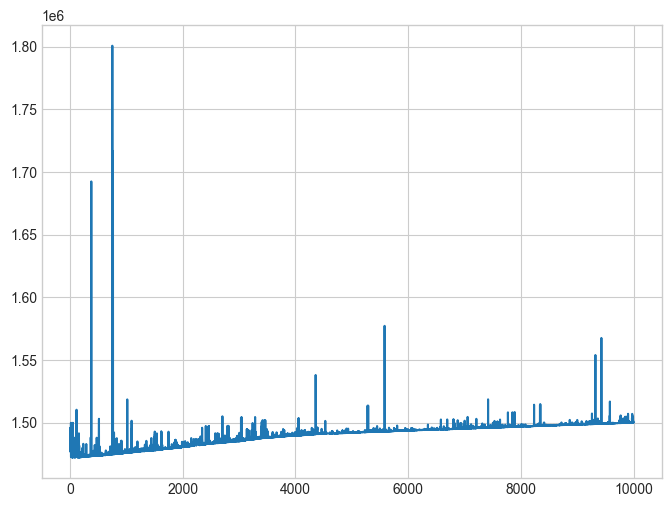

In [16]:
print("Megha Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Job Completion Time"]

ax.plot(x, y)
plt.savefig('Megha_GOOG.pdf')

Sparrow Job Completion Time


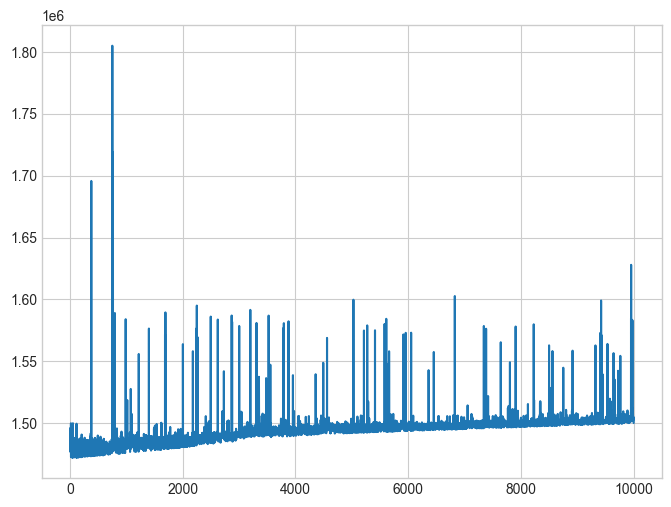

In [17]:
print("Sparrow Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Sparrow Job Completion Time"]

ax.plot(x, y)

plt.show()

Ideal Job Completion Time


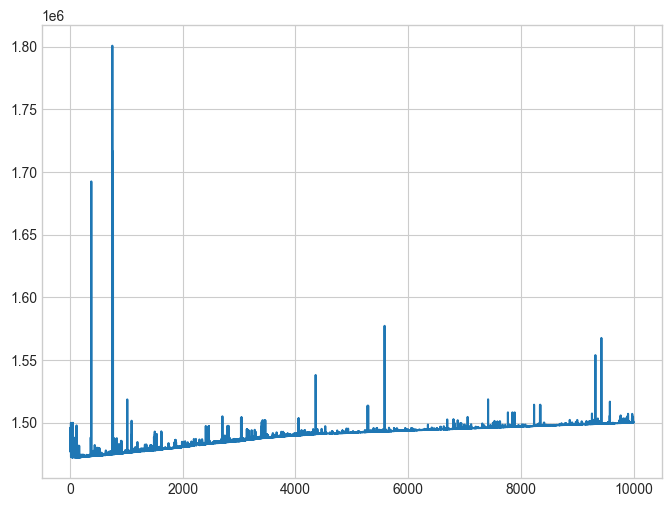

In [18]:
print("Ideal Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Ideal Job Completion Time"]
ax.plot(x, y)

In [19]:
final_df.to_csv(BASE_FILE_PATH / Path("job_completion_times.csv"))

In [20]:
final_df["Megha Delay in Job Completion Time"] = final_df["Megha Job Completion Time"] - final_df["Ideal Job Completion Time"]
final_df["Sparrow Delay in Job Completion Time"] = final_df["Sparrow Job Completion Time"] - final_df["Ideal Job Completion Time"]

final_df

,Megha Job Completion Time,Sparrow Job Completion Time,Ideal Job Completion Time,Megha Delay in Job Completion Time,Sparrow Delay in Job Completion Time
Job ID,,,,,
1,1.492708e+06,1.492708e+06,1492708.00,0.0015,0.0015
2,1.495854e+06,1.495854e+06,1495854.00,0.0015,0.0015
3,1.476978e+06,1.476978e+06,1476978.00,0.0015,0.0015
4,1.490510e+06,1.490510e+06,1490510.00,0.0015,0.0015
5,1.487775e+06,1.487775e+06,1487775.00,0.0015,0.0015
...,...,...,...,...,...
9996,1.500199e+06,1.502715e+06,1500190.12,8.9915,2524.9275
9997,1.500154e+06,1.504303e+06,1500153.13,0.9495,4149.9415
9998,1.500187e+06,1.503149e+06,1500175.14,11.9415,2973.9195


In [21]:
final_df["Megha Delay in Job Completion Time"].describe()

count    10000.000000
mean        67.728505
std        591.225397
min          0.001500
25%          0.069500
50%          2.027500
75%          8.990000
max      24688.109500
Name: Megha Delay in Job Completion Time, dtype: float64

In [22]:
final_df["Sparrow Delay in Job Completion Time"].describe()

count     10000.000000
mean       4524.080259
std        6620.165285
min           0.001500
25%        2848.020000
50%        3877.493000
75%        4993.018250
max      127912.023500
Name: Sparrow Delay in Job Completion Time, dtype: float64

In [23]:
final_df.to_csv(BASE_FILE_PATH / Path("delay_in_job_completion_times.csv"))

---